In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


In [ ]:
import zipfile
import os

archive = next(iter(uploaded))

with zipfile.ZipFile(archive, 'r') as zip_ref:
    zip_ref.extractall("data")

In [ ]:
import pandas as pd

os.listdir("data")

['diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
 'diabetes_012_health_indicators_BRFSS2015.csv',
 'diabetes_binary_health_indicators_BRFSS2015.csv']

In [ ]:
df = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Proje için en ideal veri setinin diabetes_012_health_indicators_BRFSS2015.csv olduğuna karar verdik bu yüzden bununla devam ediyoruz. Çoklu sınıflandırma için ideal.

In [ ]:
# Veri setinin yapısı
df.info()

# Temel istatistikler
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


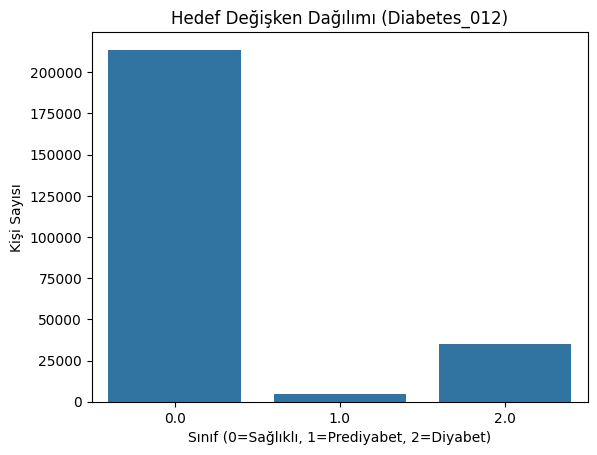

In [ ]:
#Hedef değişken dağılımı (Sınıf Dengesi)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetes_012', data=df)
plt.title("Hedef Değişken Dağılımı (Diabetes_012)")
plt.xlabel("Sınıf (0=Sağlıklı, 1=Prediyabet, 2=Diyabet)")
plt.ylabel("Kişi Sayısı")
plt.show()

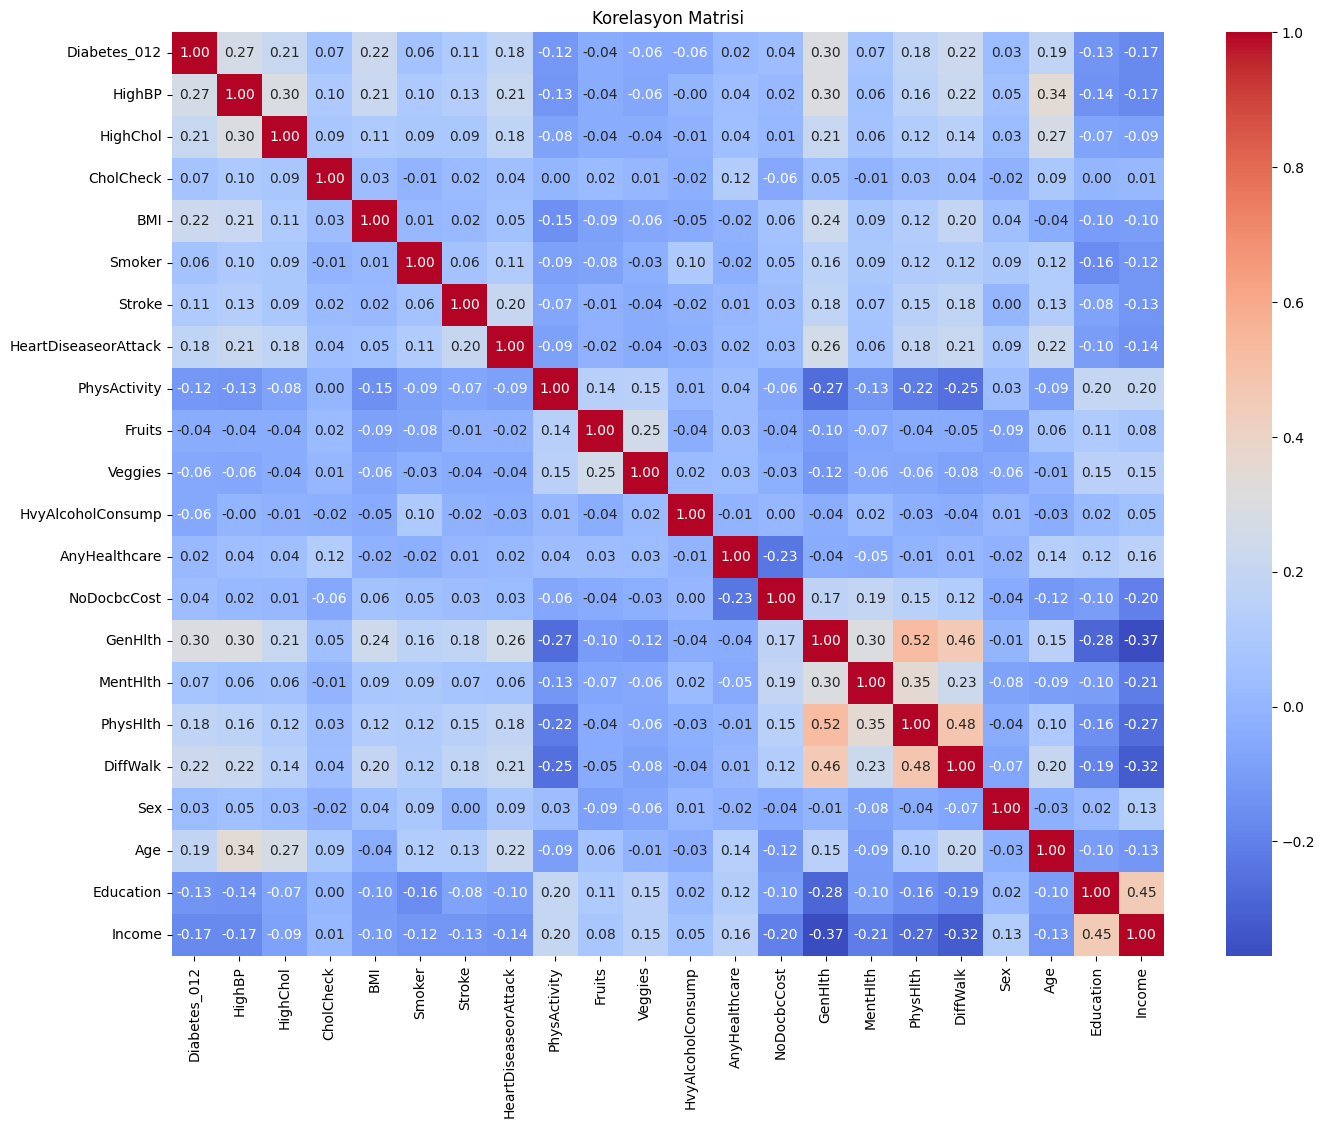

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Korelasyon matrisi
plt.figure(figsize=(16, 12))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

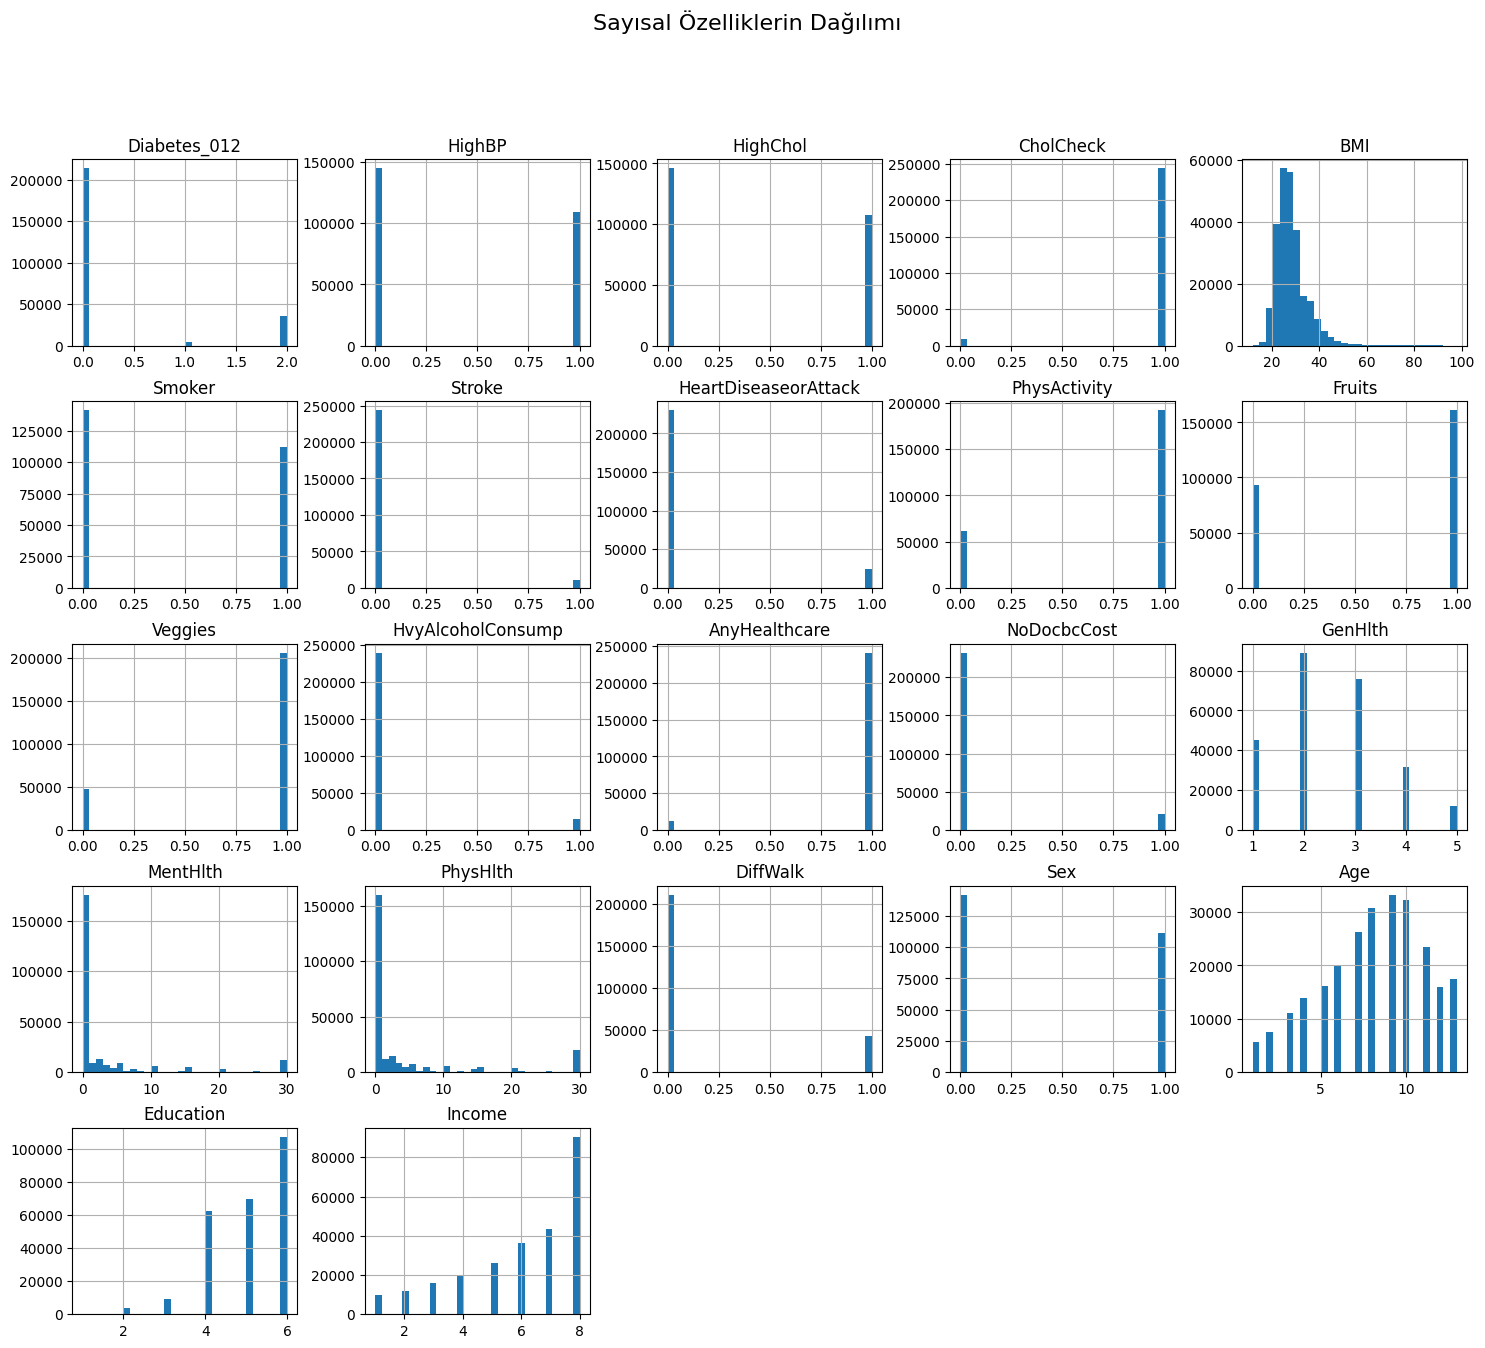

In [ ]:
df[numeric_cols].hist(figsize=(18, 15), bins=30)
plt.suptitle("Sayısal Özelliklerin Dağılımı", fontsize=16)
plt.show()

Korelasyon matrisi sayesinde birbiriyle yüksek ilişkili nitelikleri görebiliyoruz. Fiziksel sağlıkla genel sağlık arasında (GenHlth - PhysHlth) çok ciddi bir ilişki var örneğin. Birbirlerini destekliyorlar. Bunun dışında dağılım grafiğinden diyabeti olmayanların oranının çok daha fazla olduğunu gözlemliyoruz.

In [ ]:
import numpy as np

# Korelasyon matrisi
corr_matrix = df.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.85 üzeri korelasyonlara sahip sütunları bul
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

print("Aşırı ilişkili olduğu için çıkarılabilecek öznitelikler:")
print(to_drop)

Aşırı ilişkili olduğu için çıkarılabilecek öznitelikler:
[]


Bu kodun bize boş liste döndürmesinden çıkardığımız sonuç: Veri setinde aşırı yüksek (0.85+) korelasyonlu öznitelikler yok. Özellikler arasında multicollinearity riski düşük ve bu yüzden hiçbir özniteliği çıkarmadan devam edeceğiz.

In [ ]:
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

In [ ]:
#Normalizasyon
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Eğitim/Test verilerini ayıklama
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


Random Forest - K-Fold Ortalama Doğruluk: 0.8378
Random Forest - Test Accuracy: 0.8382
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.47      0.16      0.24      7069

    accuracy                           0.84     50736
   macro avg       0.44      0.38      0.38     50736
weighted avg       0.79      0.84      0.80     50736

Confusion Matrix:
 [[41412   125  1204]
 [  858     0    68]
 [ 5936    16  1117]]

Decision Tree - K-Fold Ortalama Doğruluk: 0.7637
Decision Tree - Test Accuracy: 0.7650
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     42741
         1.0       0.03      0.03      0.03       926
         2.0       0.28      0.29      0.28      7069

    accuracy                           0.76     50736
   macro avg       0.39      0.39      0

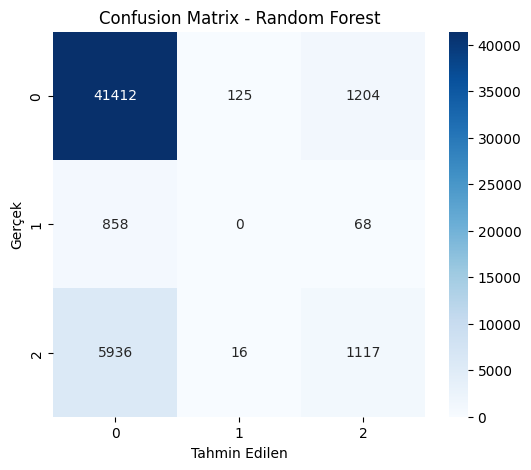

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced')
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model_name = None
best_accuracy = 0
best_model = None
best_y_pred = None

for name, model in models.items():
    # K-Fold doğruluk
    kfold_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"\n{name} - K-Fold Ortalama Doğruluk: {np.mean(kfold_scores):.4f}")

    # Train/test split üzerinden test
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # En iyi modeli sakla
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_model = model
        best_y_pred = y_pred

# Confusion Matrix görseli (en iyi model için)
print(f"\n En iyi model: {best_model_name} (Accuracy: {best_accuracy:.4f})")
cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
import pandas as pd

model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    model_results.append((name, round(acc, 4), round(macro_f1, 4)))

# Sonuçları tabloya dökelim
results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "Macro F1-Score"])
display(results_df.sort_values(by="Accuracy", ascending=False))

,Model,Accuracy,Macro F1-Score
0,Random Forest,0.8382,0.3823
2,KNN,0.8290,0.3897
1,Decision Tree,0.7646,0.3936
3,Naive Bayes,0.7579,0.4310
4,Logistic Regression,0.6458,0.4268


0. sınıf (sağlıklı) → her modelde çok iyi tahmin ediliyor
1. sınıf (prediyabet) → tüm modellerde çok kötü!!
2. sınıf (diyabet) → orta seviye başarı

RandomForest'ta:

[0 sınıfı] 41.412 örnek doğru tahmin edilmiştir. Model bu sınıfı oldukça iyi tanımaktadır.

[1 sınıfı] 926 örnekten hiçbiri doğru tahmin edilememiş, tamamı diğer sınıflara kaymıştır.

[2 sınıfı] 7.069 örneğin yalnızca 1.117’si doğru tahmin edilmiştir. Özellikle 5.936 tanesi hatalı şekilde sağlıklı (0) olarak sınıflandırılmıştır.

-Sınıf dengesizliği var ve bu bizim için büyük bir problem

Şu anda **RandomForest** en iyi sonuçları veriyor ancak Sınıf 1 (Prediyabet) tahminleri çok kötü bu yüzden SMOTE ile dengeleme yapacağız.  

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE uygulayarak eğitim verisini dengeliyoruz. (Sentetik veri üretimi)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Yeni sınıf dağılımları:")
print(y_res.value_counts())

Yeni sınıf dağılımları:
Diabetes_012
0.0    170962
2.0    170962
1.0    170962
Name: count, dtype: int64


In [ ]:
#En iyi model olan RandomForest ile başlayalım
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8281
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     42741
         1.0       0.01      0.00      0.00       926
         2.0       0.43      0.36      0.39      7069

    accuracy                           0.83     50736
   macro avg       0.44      0.43      0.43     50736
weighted avg       0.80      0.83      0.82     50736

Confusion Matrix:
 [[39475   103  3163]
 [  714     2   210]
 [ 4500    34  2535]]


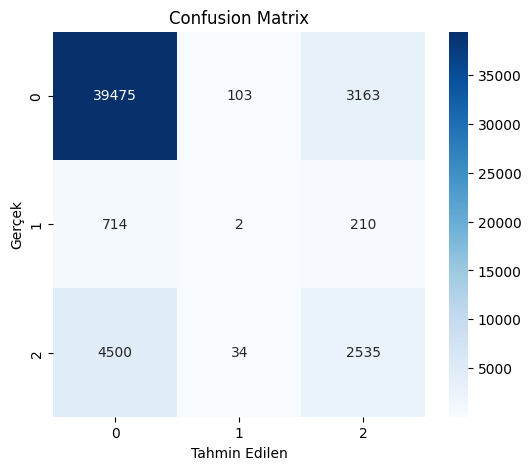

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

| Sınıf          | Doğru Tahmin | Hatalı Tahminler     | Başarı Durumu        |
| -------------- | ------------ | -------------------- | -------------------- |
| 0 (Sağlıklı)   | 39,475       | 103 → 1 ve 3,163 → 2 | Yüksek doğruluk      |
| 1 (Prediyabet) | **2**        | 714 → 0, 210 → 2     | Hâlâ çok zayıf      |
| 2 (Diyabet)    | 2,535        | 4,500 → 0, 34 → 1    | Belirgin iyileşme  |

SMOTE sonrası değerlendirmemiz:

Modelin genel doğruluğunda %0.5 civarında bir düşüş gözlense de (%83.82 → %82.81), azınlık sınıflar üzerindeki tahmin başarısında önemli bir iyileşme elde edilmiştir.

Diyabet (2.0) sınıfı için belirgin bir iyileşme var. **(recall %16 → %36)**, **(f1-score %24 → %39)**

Prediyabet (1.0) sınıfı için hâlâ çok zayıf. SMOTE ile sentetik veri üretmiş olsak da bu sınıf test setinde doğru tahmin edilemiyor.

Yine de bu sonucu "en iyi sonuç" olarak alıp devam edeceğiz.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelden önem derecelerini çekelim
importances = model.feature_importances_

# Özellik isimleriyle birlikte DataFrame oluşturalım
feature_names = df.drop("Diabetes_012", axis=1).columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Önem sırasına göre sıralayalım
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
feat_imp_df.head(10)  # En önemli 10 özelliği göster

,Feature,Importance
3,BMI,0.152398
18,Age,0.141484
13,GenHlth,0.127803
20,Income,0.107066
19,Education,0.084061
15,PhysHlth,0.071097
14,MentHlth,0.055173
0,HighBP,0.032035
4,Smoker,0.025651
1,HighChol,0.025442


from matplotlib import pyplot as plt
_df_10['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='index', y='Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

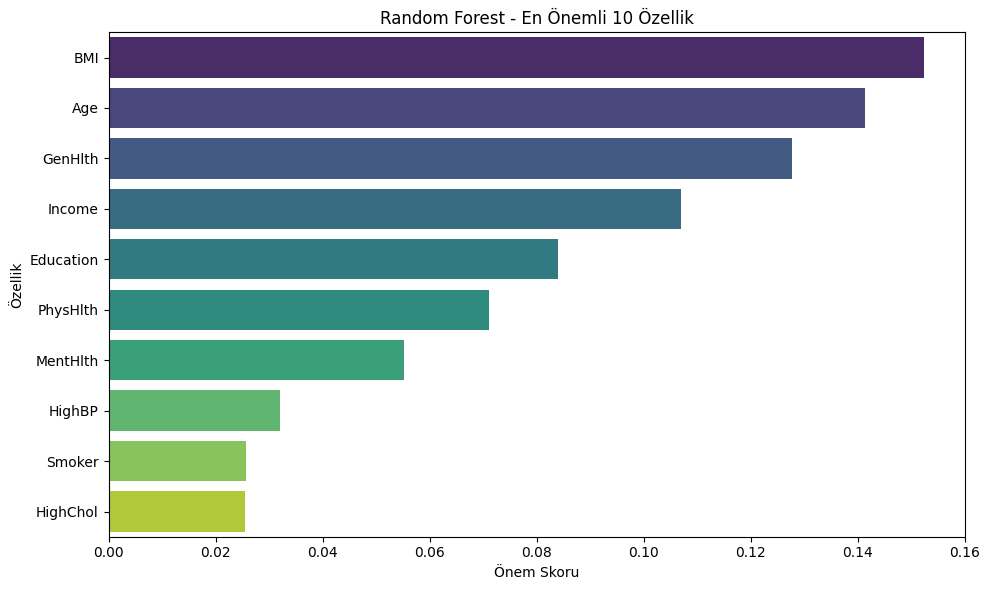

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), hue='Feature', dodge=False, palette="viridis", legend=False)
plt.title("Random Forest - En Önemli 10 Özellik")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()

| Sıra | Özellik     | Açıklama                                                         |
| ---- | ----------- | ---------------------------------------------------------------- |
| 1 | **BMI**     | Vücut kitle indeksi → Diyabetle doğrudan ilişkili (çok mantıklı) |
| 2 | **Age**     | Yaş → Risk yaşla birlikte artar                                  |
| 3 | **GenHlth** | Genel sağlık algısı → Subjektif ama güçlü sinyal                 |
| 4    | Income      | Gelir düzeyi → Sağlık hizmetine erişim etkisi olabilir           |
| 5    | Education   | Eğitim düzeyi → Sağlık farkındalığına etkisi                     |
| 6    | PhysHlth    | Fiziksel sağlıksız gün → Sağlık durumu sinyali                   |
| 7    | MentHlth    | Ruhsal sağlık → dolaylı etkiler olabilir                         |
| 8    | HighBP      | Tansiyon yüksekliği → diyabetin göstergelerinden biri            |
| 9    | Smoker      | Sigara kullanımı → dolaylı sağlık belirteci                      |
| 10   | HighChol    | Kolesterol → yine metabolik risk faktörü                         |

Bu tablodan görüyoruz ki en anlamlı değişkenler hem biyolojik hem sosyoekonomik değişkenler.